In [1]:
import os
from kid_readout.measurement import core, legacy, multiple
from kid_readout.measurement.io import nc, npy, readoutnc
from kid_readout.analysis.resonator import plot_resonator

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
nc_filename = '/data/readout/2015-05-11_150346_compressor_noise_60_s.nc'
rnc = readoutnc.ReadoutNetCDF(nc_filename)
on_index = 0
off_index = 1

In [3]:
rnc.sweeps

In [4]:
rnc.timestreams

In [5]:
ssa_off = legacy.sweepstreamarray_from_rnc(rnc, off_index, off_index)
ssa_on = legacy.sweepstreamarray_from_rnc(rnc, on_index, on_index)

In [6]:
ssa_off.to_dataframe()

,resonator_A_mag,resonator_A_mag_error,resonator_A_phase,resonator_A_phase_error,resonator_Q,resonator_Q_e_imag,resonator_Q_e_imag_error,resonator_Q_e_real,resonator_Q_e_real_error,resonator_Q_error,...,resonator_f_0,resonator_f_0_error,resonator_f_phi,resonator_f_phi_error,resonator_phi,resonator_phi_error,resonator_redchi,io_class,root_path,node_path
0,0.047544,0.000042,0,0,59060.988223,31493.402448,317.030611,83168.121243,326.129790,275.520719,...,96.067043,0.000004,96.058350,0,-1.879661,0.001798,12127.331591,NaN,NaN,NaN
1,0.046428,0.000082,0,0,85082.229750,27402.212391,753.187937,104924.178848,817.704294,847.201771,...,101.964777,0.000006,101.956055,0,0.658829,0.003804,55250.096971,NaN,NaN,NaN
2,0.047131,0.000044,0,0,89281.567140,32315.265220,342.014104,98374.289280,365.475185,425.643089,...,108.867062,0.000003,108.858398,0,0.688189,0.001981,14381.613784,NaN,NaN,NaN
3,0.046243,0.000079,0,0,95629.842704,34430.276286,877.679785,120600.407649,949.938450,980.087662,...,112.265008,0.000006,112.256348,0,1.491291,0.003777,48649.752164,NaN,NaN,NaN
4,0.044679,0.000060,0,0,106764.119657,36452.550681,640.840557,120068.732438,680.880316,784.116035,...,117.274849,0.000004,117.266113,0,2.618666,0.002875,29281.990321,NaN,NaN,NaN
5,0.043443,0.000100,0,0,87960.986491,16876.976186,918.216385,111325.324843,1041.374508,1056.114730,...,127.789184,0.000008,127.780518,0,0.655643,0.004792,66891.569429,NaN,NaN,NaN
6,0.039886,0.000097,0,0,116222.183438,25443.998073,1529.413114,153818.724483,1704.974276,1666.416692,...,144.192608,0.000009,144.183838,0,-2.396834,0.005160,70828.262703,NaN,NaN,NaN
7,0.039865,0.000062,0,0,109732.541575,18152.115412,885.353076,148326.872078,997.412677,934.179253,...,148.249792,0.000006,148.241211,0,3.108777,0.003380,25083.172565,NaN,NaN,NaN
8,0.036289,0.000080,0,0,42632.085446,10257.845051,227.430055,47487.857474,267.187555,270.649839,...,164.087681,0.000011,164.079102,0,1.182809,0.004020,21178.034467,NaN,NaN,NaN
9,0.036222,0.000085,0,0,42311.850315,7442.286920,226.077339,47920.093993,279.964874,277.700727,...,164.378872,0.000011,164.370361,0,-2.342012,0.004165,22112.378636,NaN,NaN,NaN


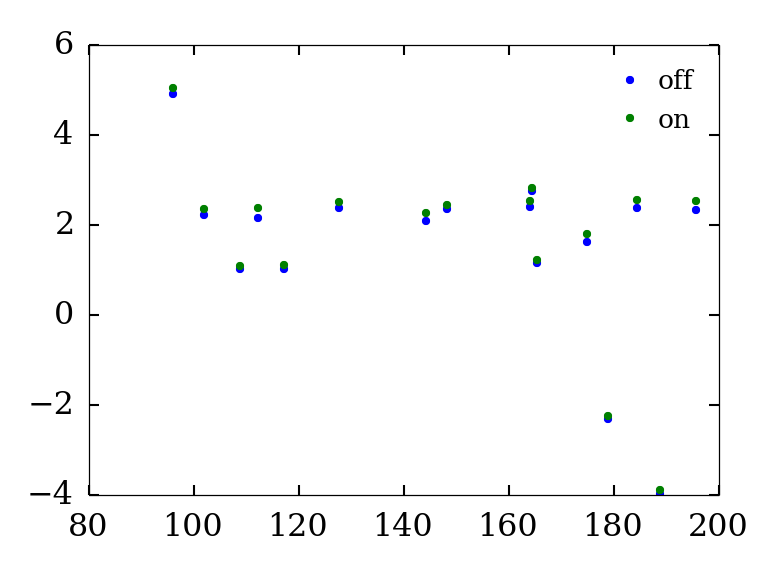

In [7]:
df_off = ssa_off.to_dataframe()
df_on = ssa_on.to_dataframe()
plt.plot(df_off.resonator_f_0, 1e6 * (1 / df_off.resonator_Q - 1 / df_off.resonator_Q_e_real), '.', label='off')
plt.plot(df_on.resonator_f_0, 1e6 * (1 / df_on.resonator_Q - 1 / df_on.resonator_Q_e_real), '.', label='on')
plt.legend(loc='best', fontsize='xx-small');

# Test read/write

In [8]:
name = 'sweepstreamarray'

In [9]:
directory = '/home/flanigan/temp/nc'
nc_filename = 'test.nc'
nc_root_path = os.path.join(directory, nc_filename)
try:
    os.remove(nc_root_path)
except OSError:
    print("Not deleted: {}".format(nc_root_path))

In [11]:
nc_io = nc.IO(nc_root_path)
%time core.write(ssa_off, nc_io, name)

CPU times: user 96 ms, sys: 189 ms, total: 285 ms
Wall time: 284 ms


In [12]:
nc_io = nc.IO(nc_root_path)
%timeit core.read(nc_io, name, close=False)

10 loops, best of 3: 117 ms per loop


In [13]:
!rm -r /home/flanigan/temp/npy

In [14]:
npy_root_path = '/home/flanigan/temp/npy'
npy_io = npy.IO(npy_root_path)
%time core.write(ssa_off, npy_io, name, close=False)

CPU times: user 135 ms, sys: 188 ms, total: 323 ms
Wall time: 324 ms


In [15]:
%timeit core.read(npy_io, name, close=False)

10 loops, best of 3: 112 ms per loop


In [16]:
npy_io_memmap = npy.IO(npy_root_path, memmap=True)
%timeit core.read(npy_io_memmap, name, close=False)

10 loops, best of 3: 62.2 ms per loop
